도착항구와 선박 국가 같은 경우

In [1]:
import warnings
warnings.filterwarnings(action="ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('../../train.csv').drop(columns="SAMPLE_ID")

In [4]:
train_df = pd.read_parquet("../../train.parquet").drop(columns="SAMPLE_ID")

In [6]:
train_df["ARI_CO"].unique()

array(['SG', 'IN', 'CN', 'JP', 'AU', 'ID', 'TW', 'QA', 'TT', 'RU', 'KR',
       'CA', 'BR', 'UA', 'MZ', 'US', 'VN', 'LV', 'PE', 'MY', 'CL', 'ZA',
       'FI', 'PH', 'VE'], dtype=object)

In [ ]:
sorted(train_df["FLAG"].unique())

In [4]:
country_mapping = {
    'Philippines': 'PH',
    'Vietnam': 'VN',
    'Malaysia': 'MY',
    'Korea, Republic of': 'KR',
    'Korea, South': 'KR',  # 추가적인 매핑
    'Indonesia': 'ID',
    'Peru': 'PE',
    'Taiwan': 'TW',
    'Chinese Taipei': 'TW',  # 추가적인 매핑
    'Japan': 'JP',
    'Brazil': 'BR',
    'Russian Federation': 'RU',
    'Russia': 'RU',  # 추가적인 매핑
    'Chile': 'CL',
    'South Africa': 'ZA',
    'Qatar': 'QA',
    'Canada': 'CA',
    'Singapore': 'SG',
    'Australia': 'AU',
    'China': "CN",
    "China, People's Republic Of": 'CN',  # 추가적인 매핑
    'Venezuela': 'VE',  # 이 목록에서 베네수엘라는 없습니다.
    'United States of America': 'US',
    'United States Of America': 'US',  # 추가적인 매핑
    'Trinidad and Tobago': 'TT',  # 이 목록에서 트리니다드 토바고는 없습니다.
    'Mozambique': 'MZ',  # 이 목록에서 모잠비크는 없습니다.
    'Finland': 'FI',
    'Latvia': 'LV',
    'India': 'IN',
    'Ukraine': 'UA'
}

In [5]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [13]:
train_df["NEW_FLAG"] = train_df["FLAG"].apply(lambda x : country_mapping.get(x, "Unknown"))
train_df["NEW_FLAG"].describe()

count      391939
unique         23
top       Unknown
freq       255742
Name: NEW_FLAG, dtype: object

In [ ]:
train_df["NEW_FLAG"] = train_df["FLAG"].apply(lambda x : country_mapping.get(x, "Unknown")

In [6]:
len(train_df[train_df["FLAG"].apply(lambda x : country_mapping.get(x, "Unknown")) == "CN"])

40309

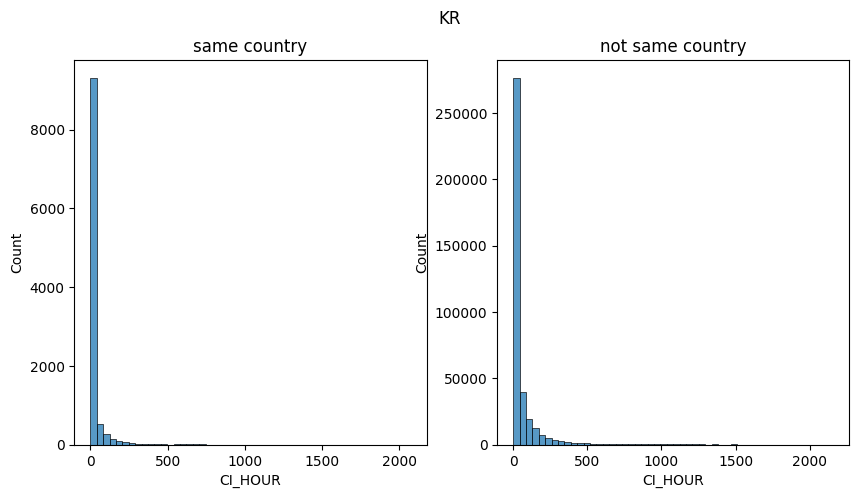

In [9]:
num_rows = 1
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))


df_1 = train_df[(train_df["ARI_CO"] == "KR") | ("Korea" in train_df["FLAG"])]
ax1 = sns.histplot(df_1["CI_HOUR"], bins=50, ax=axes[0])
ax1.set_title("same country")

df_2 = train_df[(train_df["ARI_CO"] != "KR") | ("Korea" in train_df["FLAG"])]
ax2 = sns.histplot(df_2["CI_HOUR"], bins=50, ax=axes[1])
ax2.set_title("not same country")

fig.suptitle("KR")
plt.show()

선박 국가와 도착 항구가 같던 다르던 크게 상관이 없는 듯 하다

In [24]:
Kor_country_mapping = {
    "PH": "필리핀",
    "VN": "베트남",
    "MY": "말레이시아",
    "KR": "대한민국",
    "ID": "인도네시아",
    "PE": "페루",
    "TW": "대만",
    "JP": "일본",
    "BR": "브라질",
    "RU": "러시아 연방",
    "CL": "칠레",
    "ZA": "남아프리카 공화국",
    "QA": "카타르",
    "CA": "캐나다",
    "SG": "싱가포르",
    "AU": "호주",
    "CN": "중국",
    "VE": "베네수엘라",
    "US": "미국",
    "TT": "트리니다드 토바고",
    "MZ": "모잠비크",
    "FI": "핀란드",
    "LV": "라트비아",
    "IN": "인도",
    "UA": "우크라이나"
}


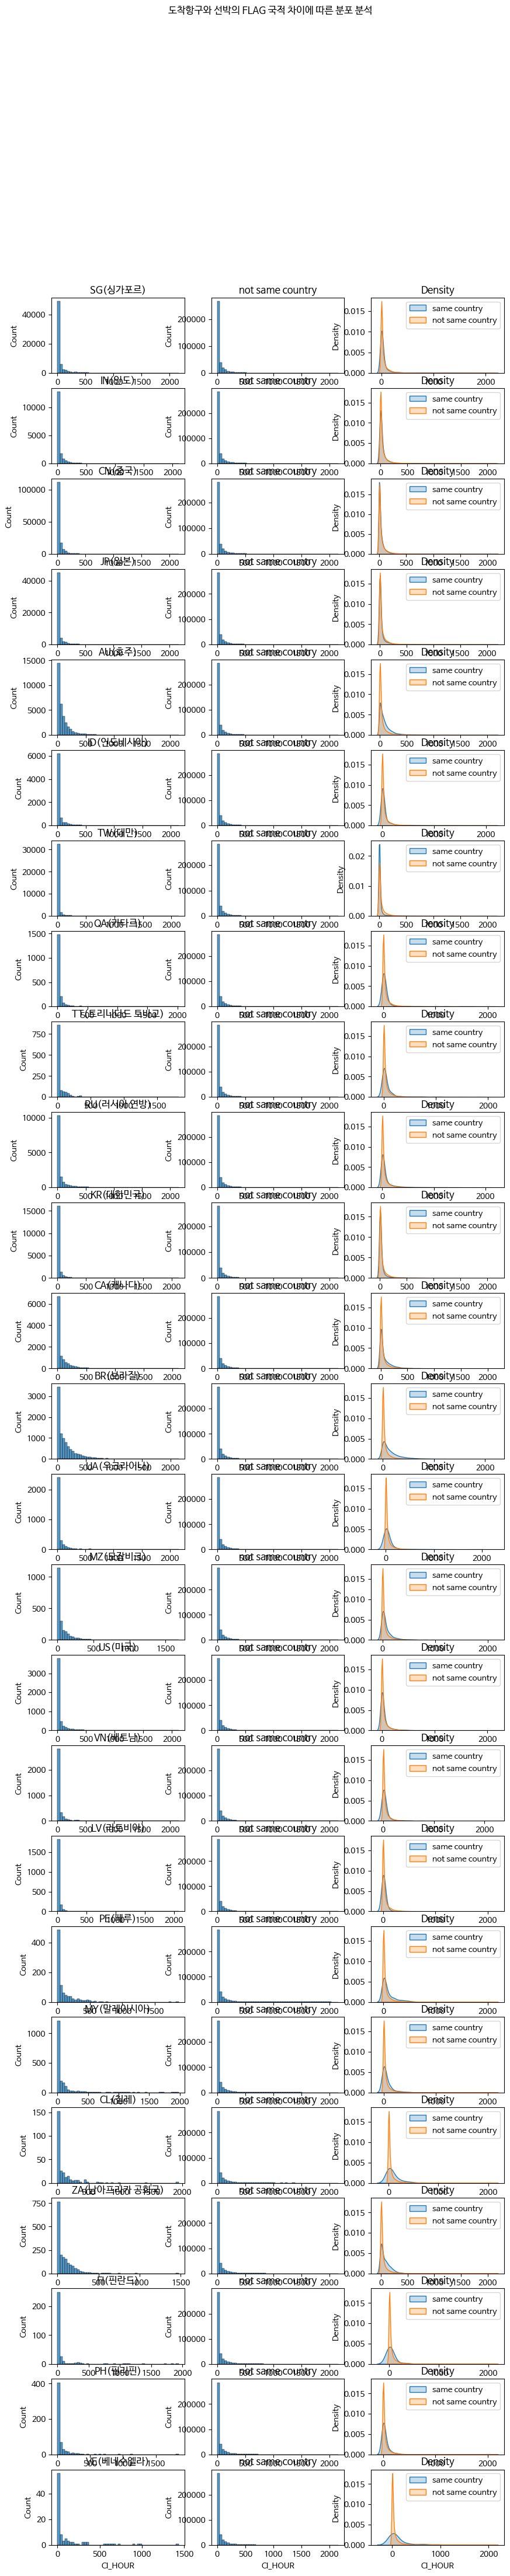

In [27]:
country_list = list(train_df["ARI_CO"].unique())
num_cols = 2
num_rows = len(country_list)

fig, axes = plt.subplots(num_rows, 3, figsize=(10, 2 * num_rows))
for idx, country_code in enumerate(country_list):
    df_1 = train_df[(train_df["ARI_CO"] == country_code) | (train_df["FLAG"].apply(lambda x : country_mapping.get(x, "Unknown")) ==  country_code)]
    # print(df_1.head())
    sns.histplot(df_1["CI_HOUR"], bins=50, ax=axes[idx][0])
    axes[idx][0].set_title(f'{country_code}({Kor_country_mapping[country_code]})')

    df_2 = train_df[(train_df["ARI_CO"] == country_code) | (train_df["FLAG"].apply(lambda x : country_mapping.get(x, "Unknown")) !=  country_code)]
    sns.histplot(df_2["CI_HOUR"], bins=50, ax=axes[idx][1])
    axes[idx][1].set_title("not same country")
    
    sns.kdeplot(df_1["CI_HOUR"], label="same country", shade=True, ax=axes[idx][2])
    sns.kdeplot(df_2["CI_HOUR"], label="not same country", shade=True, ax=axes[idx][2])
    axes[idx][2].set_title("Density")
    axes[idx][2].legend()

fig.suptitle("도착항구와 선박의 FLAG 국적 차이에 따른 분포 분석")
# plt.tight_layout()
plt.show()
